# LegoCons(路径,搭建项目名称)    类

- 类初始化时，会运行一次creatItem()
    
- LegoCons.creatItem()
    - 如果没有同名的，则创建文件夹
    - 文件夹下建立：零件总图、video 两个子文件夹
    
- LegoCons.expHTML_lego()
    - 包括有 **makeList()**
    - 导出相应的微信公众号文章后台可左右滑动图片代码，代码文件名为：002长颈鹿_html.txt
    - 相应的照片应该传到腾讯cos上
    
- LegoCons.putTag()
    - 给零件总图下的图片按“步骤列表.xlsx”中的描述添加文字
    - 生成文件名为xxx_tagged.png
    
- LegoCons.makeList()
    - 根据文件夹中的图片，生成排序列表，用于：
        - 供 expHTML_lego 制作公众号后台图片滑动
        - 供 ConsMovie 类将图片合成视频
    - 排序列表导出“步骤列表.xlsx”保存在文件夹内
    
- 举例：
    ```
    mylego=LegoCons('I:\\乐高\\图纸','002长颈鹿')
    mylego.creatItem()
    mylego.makeList()
    mylego.putTag()
    mylego.expHTML_lego()
    ```
    
    
# ConsMovie(路径,搭建项目名称)   类

- 实例化时即运行 **LegoCons.makeList()**
- ConsMovie.expMovie()
    - 导出视频，命名为“002长颈鹿_搭建视频.mp4”

- 举例：
    ```
    myMovie=ConsMovie('I:\\乐高\\图纸','002长颈鹿')
    myMovie.expMovie()
    ```
    
# LegoWeekly(路径)类
- 实例化
- 运行LegoWeekly.expPoster()
- 搭建路径下的文件名：

    topic.xlsx——文字将被写到图片上
    
    legoWeeklyBG.jpg——背景
    
    - topic.xlsx格式：
    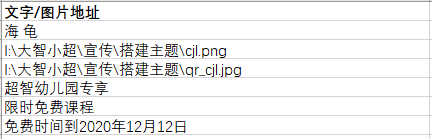
    ```
    文字/图片地址（列标题，必须）
    海龟
    I:\大智小超\宣传\搭建主题\cjl.png
    I:\大智小超\宣传\搭建主题\qr_cjl.jpg
    超智幼儿园专享
    限时免费课程
    免费时间到2020年12月12日
    ```
    
- 举例：
    ```
    myPoster=LegoWeekly('I:\大智小超\宣传\搭建主题')
    myPoster.expPoster()
    ```

    
    
# 流程
1. 实例化类 / 创建项目（实例化的同时，如项目不存在，即创建）
    ```
    mylego=LegoCons('I:\\乐高\\图纸','002长颈鹿')
    ```
2. 用Studio制作步骤图，放到项目文件夹里。
3. 创建步骤列表，生成**002长颈鹿步骤列表.xlsx** ，如需修改图片描述，在**这一步**修改。
    ```
    mylego.makeList()
    ```
4. 给“零件总图”里的图片按步骤列表中的“描述”打上文字 
    ```
    mylego.putTag()
    ```
5. 导出公众号后台的html文件 
    ```
    mylego.expHTML_lego()
    ```
6. 实例化类 
    ```
    myMovie=ConsMovie('I:\\乐高\\图纸','002长颈鹿')
    ```
7. 导出影片 
    ```
    myMovie.expMovie()
    ```


In [ ]:
import os
import re
from moviepy.editor import *
import moviepy.audio.fx.all as afx
import pandas as pd
import numpy as np
from PIL import Image
from PIL import ImageDraw  
from PIL import ImageFont
import psutil



class LegoCons:
    def __init__(self,pth,consName):
        self.pth=pth
        self.consName=consName
        self.creatItem()
        
    def creatItem(self):
        New=os.path.join(self.pth,self.consName)
        if not os.path.exists(New):
            print('新项目，创建文件夹...\n')
            os.makedirs(New)
            new_totals=os.path.join(self.pth,self.consName,'零件总图')
            new_video=os.path.join(self.pth,self.consName,'video')
            print('文件夹{}创建完成\n'.format(' '+self.consName+' '))
            
            if not os.path.exists(new_totals):
                os.makedirs(new_totals)
                print('文件夹{}创建完成\n'.format(' 零件总图 '))
            if not os.path.exists(new_video):
                os.makedirs(new_video)
                print('文件夹{}创建完成\n'.format(' video '))
        else:
            print('已有项目\n')
            new_totals=os.path.join(self.pth,self.consName,'零件总图')
            new_video=os.path.join(self.pth,self.consName,'video')
            if not os.path.exists(new_totals):
                os.makedirs(new_totals)
                print('文件夹{}创建完成\n'.format(' 零件总图 '))
            if not os.path.exists(new_video):
                os.makedirs(new_video)
                print('文件夹{}创建完成\n'.format(' video '))
          
    def expHTML_lego(self):
        lsts=self.makeList()     
        
        html_pic_addr=''
        _pre_pic='''
        </section>
                        <section style="color: #bfbfbf;padding-top: 10px;padding-bottom: 10px;display: inline-block;width: 100%;box-sizing: border-box;" data-width="75%">
                            <section class="_135editor" data-tools="135编辑器" data-id="95138">
                                <section class="_135editor">
                                    <section style="margin: 1em auto;text-align: center;padding: 5px;border-width: 1px;border-style: solid;border-color: transparent;overflow: hidden;box-sizing: border-box;">
                                        <section class="135brush" data-style="display: inline-block;width: 100%;margin:0;padding:0;" style="white-space: nowrap;overflow-x: scroll;">
        '''


        pre_pic_addr='''
         <img class="" data-ratio="0.75" data-type="jpeg" data-w="1200" data-width="100%" src="https://chuntianhuahua-1257410889.cos.ap-guangzhou.myqcloud.com/legoCons/
         '''
        after_pic_addr='"/>'
        
        for lst in lsts:
            html_pic_addr=html_pic_addr+pre_pic_addr.strip()+lst+after_pic_addr+'\n'
            
        out=_pre_pic+html_pic_addr
        print('生成html...完成\n')
        
        with open(os.path.join(self.pth,self.consName,self.consName+'_html.txt'),'w') as f:
            f.write(out)
        
        print('写入txt...完成\n')
        
    def putTag(self):        
        dirs=os.path.join(self.pth,self.consName,'零件总图')
        df=pd.read_excel(os.path.join(self.pth,self.consName,self.consName+'步骤列表.xlsx'))
        tag_list=np.array(df.loc[~pd.isna(df['描述'])]).tolist()
        
        print('正在给图片添加文字描述……\n')
        
        font = ImageFont.truetype('C:\Windows\Fonts\msyh.ttc',80)
        for lst in tag_list:
            if not os.path.exists(os.path.join(self.pth,lst[0])):
                pth=os.path.join(self.pth,lst[0].replace('_tagged.png','.png')) #因makelist()生成的列表为包含了tagged.png的文件名，所以要改回来。
            else:
                pth=os.path.join(self.pth,lst[0])
            txt=lst[1]
            print(pth,txt)
            img=Image.open(pth)
            
            draw = ImageDraw.Draw(img)            
            draw.text((200,int(img.size[1]*0.87)), txt, fill = '#6AB34A',font=font)  #6AB34A  95ff67
            NewName=pth.replace('.png','_tagged.png')
            img.save(NewName)
#             img.show()       
#             break
        print('添加文字完成 \n')
    
    def putTag_wedo_coverpage(self):
        print('正在为封面首图添加知识点……',end='')
        font_title = ImageFont.truetype('j:/fonts/yousheTitleHei.ttf',80)
        font_title2 = ImageFont.truetype('j:/fonts/yousheTitleHei.ttf',30)
        font_info = ImageFont.truetype('j:/fonts/yousheTitleHei.ttf',25)
        wedo_course_file=os.path.join(self.pth,'Wedo课程表.xlsx')
        df=pd.read_excel(wedo_course_file)
        course_info=np.array(df.loc[df['课程名称']==self.consName[3:]])
        crs_type,crs_name,crs_age,crs_star,crs_intro,crs_lego=course_info[0]
        crs_age='适合年龄： '+crs_age
        crs_lego='使用教具： '+crs_lego
        img=Image.open(os.path.join(self.pth,self.consName,self.consName[3:]+'.jpg'))
        draw = ImageDraw.Draw(img)     
        draw.text((100,int(img.size[1]*0.1)), crs_name, fill = '#6AB34A',font=font_title)  #6AB34A  95ff67
        draw.text((100,int(img.size[1]*0.3)), crs_age, fill = '#6AB34A',font=font_title2)  #6AB34A  95ff67
        draw.text((100,int(img.size[1]*0.4)), crs_lego, fill = '#6AB34A',font=font_title2)  #6AB34A  95ff67
        draw.text((100,int(img.size[1]*0.5)), crs_intro, fill = '#6AB34A',font=font_info)  #6AB34A  95ff67
        img.save(os.path.join(self.pth,self.consName,self.consName[3:]+'.jpg'))
        print('完成 \n')        
      
    def makeList(self):
        n=0
        pngList=[]
        for file in os.listdir(os.path.join(self.pth,self.consName)):
            if file[-3:].lower()=='png' and len(file)<10:
                os.rename(os.path.join(self.pth,self.consName,file),os.path.join(self.pth,self.consName,file.zfill(10)))
                pngList.append(file.zfill(10))
                n+=1
            elif file[-3:].lower()=='png':
                pngList.append(self.consName+"/"+file)
        pngList.sort()
        if n>0:
            print('改名{}个文件'.format(n))
        
        if os.path.exists(os.path.join(self.pth,self.consName,'零件总图')):
#             print('存在零件总图\n')
            totalList=[]
            n=0
            for file in os.listdir(os.path.join(self.pth,self.consName,'零件总图')):
                if file[-10:].lower()=='tagged.png': #把加标签的放入列表
                    totalList.append(self.consName+'/零件总图/'+file)
                    n+=1
            if n==0:  #如果没有打过标签的零件图，则把原图放到列表
                for file in os.listdir(os.path.join(self.pth,self.consName,'零件总图')):
                    if file[-3:].lower()=='png': #如无加过标签，列表中也要改为_tagged.png的后缀
                        newFile=file.replace('.png','_tagged.png')
                        totalList.append(self.consName+'/零件总图/'+newFile)
        else:
#             pass
            print('无零件总图')
        totalList.sort()
        
        outList=[self.consName+'/'+self.consName[3:]+'.jpg']
        outList.extend(totalList)
        outList.extend(pngList)

        stepList=os.path.join(self.pth,self.consName,self.consName+'步骤列表.xlsx')
        if not os.path.exists(stepList):
            df=pd.DataFrame(outList)
            df.columns=['步骤']
            df['描述']=''
            df.loc[df['步骤'].str.contains('零件总图'),'描述']='结构分解图 / 零件清单' #将零件总图的“描述”先预设为“零件清单”
            df.to_excel(stepList,index=False)       

        print('生成 文件列表...完成\n')
        return outList    
    
class ConsMovie:
    def __init__(self,pth,consName,crs_list):                 
        self.endV=r'I:\大智小超\公共素材\视频类\片尾01.mp4'
        self.pth=pth
        self.consName=consName
        self.k=1/3 #转场占时长的比例
        self.crs_listInput=crs_list
        if self.crs_listInput=='Wedo课程表.xlsx':          
            self.bgm=r'I:\大智小超\公共素材\声音类\lego_wedo_long.mp3'
        elif self.crs_listInput=='大颗粒课程表.xlsx':  
            self.bgm=r'I:\大智小超\公共素材\声音类\legoBGM.mp3'    
        
        self.crs_list=os.path.join(pth,crs_list)  
        df=pd.read_excel(self.crs_list)
        course_info=np.array(df.loc[df['课程名称']==self.consName[3:]])
        self.crs_type,self.crs_name,self.crs_age,self.crs_star,self.crs_intro,self.crs_lego=course_info[0]
        self.crs_age="适合年龄："+self.crs_age
        self.crs_star="搭建难度："+self.crs_star
        self.crs_lego="使用教具："+self.crs_lego
        
        a=LegoCons(self.pth,self.consName)
        self.lst=a.makeList()
        
    def exportMovie(self):
        if 3*(1-self.k)*len(self.lst) < 56:
            print('60秒以内\n')
            self.expMovie()
        else:
            print('超过60秒，将加快到60秒以内\n')
            self.expMovieIn60s()
        
    
    def expMovie(self):
        print('正在剪辑...\n')
        w,h=850,480
        self.w=w
        self.h=h
        clips=[]
        n=0
        drtn=3
        self.drtn=drtn
        crstime=1
        for p in self.lst:
            fn=os.path.join(self.pth,p)
            if n==0:
                _img=ImageClip(fn).set_fps(25).set_duration(drtn).resize((w,h))
                clips.append(_img)
                n+=1
            else:
                _img=ImageClip(fn).set_fps(25).set_duration(drtn).resize((w,h)).crossfadein(crstime).set_start((drtn-crstime)*n)
                clips.append(_img)
                n+=1    
                
        #计算正片时间，供logo字幕用
        drt=0
        for c in clips:
            drt=drt+(c.duration-crstime)
        subtitle_drt=drt-clips[0].duration                            
                
        #加上片尾
        print('正在处理片尾...\n')
        endvideo=VideoFileClip(self.endV,target_resolution=(h,w)).set_start((drtn-crstime)*n) # 片尾   分辨率是先写h,再写w  大坑
        clips.append(endvideo)        
        
        print('正在处理字幕...\n')        
        clips=self.put_cover_text(clips)        
        
        #text=self.subtitle_right_btm(self.consName[3:],60,w,h)
        #clips.append(text)
#         text = TextClip(txt='大智小超科学实验室', fontsize=15, \
#                  font='Microsoft-YaHei-&-Microsoft-YaHei-UI',color='#9EACC1') \
#                 .set_pos((685,445)).set_start(clips[0].duration).set_duration(subtitle_drt)        
#         clips.append(text)      
                
        # finalclip = concatenate_videoclips([_img1,_img2])
        
        logo=ImageClip(r"I:\大智小超\公共素材\图片类\00大智小超科学实验室商标.png") \
            .set_fps(25).set_duration(drt).resize((80,48)).set_position((740,420)) \
            .crossfadein(crstime).set_start(0)
        clips.append(logo)
        
        print('正在拼接视频...\n') 
        
        finalclip = CompositeVideoClip(clips)
        
        #加上背景音乐
        print('正在添加背景音乐...\n')
        BGM=AudioFileClip(self.bgm)
        print([finalclip.duration,endvideo.duration])
        
        final_audio = CompositeAudioClip([BGM,finalclip.audio]).set_duration(finalclip.duration-endvideo.duration).fx(afx.audio_fadeout,0.8)
        mix=finalclip.set_audio(final_audio)
        totalTime=finalclip.duration
        
        out=os.path.join(self.pth,self.consName,self.consName+'_搭建视频_'+str(int(totalTime))+'s.mp4')
        print('正在导出视频：{}...\n'.format(out))
        mix.write_videofile(out)
        self.killProcess()
        print('Done')
        
    def expMovieIn60s(self):
        print('正在剪辑...\n')
        w,h=850,480
        self.w=w
        self.h=h
        clips=[]
        n=0
        
        drtn=56/len(self.lst)/(1-self.k)
        self.drtn=drtn
        crstime=drtn*self.k
        for p in self.lst:
            fn=os.path.join(self.pth,p)
            if n==0:
                _img=ImageClip(fn).set_fps(25).set_duration(drtn).resize((w,h))
                clips.append(_img)
                n+=1
            else:
                _img=ImageClip(fn).set_fps(25).set_duration(drtn).resize((w,h)).crossfadein(crstime).set_start((drtn-crstime)*n)
                clips.append(_img)
                n+=1    
                
        #计算正片时间，供logo字幕用
        drt=0
        for c in clips:
            drt=drt+(c.duration-crstime)
        subtitle_drt=drt-clips[0].duration                            
                
        #加上片尾
        print('正在处理片尾...\n')
        endvideo=VideoFileClip(self.endV,target_resolution=(h,w)).set_start((drtn-crstime)*n) # 片尾   分辨率是先写h,再写w  大坑
        clips.append(endvideo)        
        
        print('正在处理字幕...\n')
        
        clips=self.put_cover_text(clips) 
        
        logo=ImageClip(r"I:\大智小超\公共素材\图片类\00大智小超科学实验室商标.png") \
            .set_fps(25).set_duration(drt).resize((80,48)).set_position((740,420)) \
            .crossfadein(crstime).set_start(0)
        clips.append(logo)
        
        print('正在拼接视频...\n')
        finalclip = CompositeVideoClip(clips)
        
        #加上背景音乐
        print('正在添加背景音乐...\n')
        BGM=AudioFileClip(self.bgm).set_duration(finalclip.duration-endvideo.duration).fx(afx.audio_fadeout,0.8)
        final_audio = CompositeAudioClip([BGM,finalclip.audio])
        mix=finalclip.set_audio(final_audio)
        totalTime=finalclip.duration
        
        out=os.path.join(self.pth,self.consName,self.consName+'_搭建视频_forced_60s.mp4')
        print('正在导出视频：{}...\n'.format(out))
        mix.write_videofile(out)
        self.killProcess()
        print('Done')
        
    # 杀死moviepy产生的特定进程
    def killProcess(self):
        # 处理python程序在运行中出现的异常和错误
        try:
            # pids方法查看系统全部进程
            pids = psutil.pids()
            for pid in pids:
                # Process方法查看单个进程
                p = psutil.Process(pid)
                # print('pid-%s,pname-%s' % (pid, p.name()))
                # 进程名
                if p.name() == 'ffmpeg-win64-v4.1.exe':
                    # 关闭任务 /f是强制执行，/im对应程序名
                    cmd = 'taskkill /f /im ffmpeg-win64-v4.1.exe  2>nul 1>null'
                    # python调用Shell脚本执行cmd命令
                    os.system(cmd)
        except:
            pass
        
    def subtitle_right_btm(self,txt,fsz,w,h,drtn):
        x=w-len(txt)*fsz-30
        y=h-fsz-30
        text = TextClip(txt=txt, fontsize=fsz, font='Microsoft-YaHei-&-Microsoft-YaHei-UI',color='#95ff67').set_pos((x,y)).set_duration(drtn)
        return text
    
    def put_cover_text(self,clips):
        if self.crs_listInput=='Wedo课程表.xlsx' or self.crs_listInput=='9686课程表.xlsx' :  
            crs_h_name=0.05
            crs_h_age=0.3
            crs_h_lego=0.35
            crs_h_intro=0.6
        else:
            crs_h_name=0.05
            crs_h_age=0.6
            crs_h_lego=0.65
            crs_h_intro=0.8
        
        text = TextClip(txt=self.crs_name, fontsize=85, font='j:/fonts/yousheTitleHei.ttf',color='#6AB34A') \
                .set_pos((self.w*0.05,self.h*crs_h_name)).set_duration(self.drtn)
        clips.append(text)
        
        text = TextClip(txt=self.crs_age, fontsize=20, font='j:/fonts/yousheTitleHei.ttf',color='#6AB34A') \
                .set_pos((self.w*0.05,self.h*crs_h_age)).set_duration(self.drtn)
        clips.append(text)
        
        text = TextClip(txt=self.crs_lego, fontsize=20, font='j:/fonts/yousheTitleHei.ttf',color='#6AB34A') \
                .set_pos((self.w*0.05,self.h*crs_h_lego)).set_duration(self.drtn)
        clips.append(text)
        
        text = TextClip(txt=self.crs_intro,align='West',fontsize=25, font='j:/fonts/yousheTitleHei.ttf',color='#6AB34A') \
                .set_pos((self.w*0.05,self.h*crs_h_intro)).set_duration(self.drtn)
        clips.append(text)
        
        return clips       
    
class LegoWeekly:
    def __init__(self,pth):
        self.pth=pth
        self.bg=os.path.join(pth,'legoWeeklyBG.jpg')
        
    def expPoster(self):
        print('开始生成积木搭建海报 \n')
        xls=os.path.join(self.pth,'topic.xlsx')
        df=pd.read_excel(xls)
        df_list=list(df['文字/图片地址'])
        bg=Image.open(self.bg)
        topicImg=Image.open(df_list[1])
        
        if df_list[2][-3:].lower()=='png' or df_list[2][-3:].lower()=='jpg':
            print('图片格式的二维码，直接嵌入背景。\n')
            qrImg=Image.open(df_list[2])
            qrImg=qrImg.resize((280,280),Image.ANTIALIAS)
        else:            
            qrImg=self.makeQR(df_list[2])
        
        bg.paste(topicImg,(260,580))
        bg.paste(qrImg,(400,1200))       
        
        
        #行一：主题名字
        font_size=90
        txt=df_list[0]
        lth=self.cal_len_str(txt)
        x=(1080-int((font_size*lth[0]+int(font_size*lth[1])/2)))/2
        font = ImageFont.truetype('C:\Windows\Fonts\msyh.ttc',font_size)
        draw = ImageDraw.Draw(bg)         
        draw.text((x,390), txt, fill = '#009b5b',font=font)
        
        #测试用
#         font_size=90
#         txt='海aa龟'
#         lth=self.cal_len_str(txt)
#         x=(1080-int((font_size*lth[0]+int(font_size*lth[1])/2)))/2
#         print(x)
#         font = ImageFont.truetype('C:\Windows\Fonts\msyh.ttc',font_size)
#         draw = ImageDraw.Draw(bg)         
#         draw.text((x,490), txt, fill = '#009b5b',font=font)
        
        #行二
        font_size=40
        txt=df_list[3]
        lth=self.cal_len_str(txt)
        x=(1080-int((font_size*lth[0]+int(font_size*lth[1])/2)))/2
        font = ImageFont.truetype('C:\Windows\Fonts\msyh.ttc',font_size)
        draw = ImageDraw.Draw(bg)         
        draw.text((x,1560), txt, fill = '#003e69',font=font)
        
        #行三
        font_size=65
        txt=df_list[4]
        lth=self.cal_len_str(txt)
        x=(1080-int((font_size*lth[0]+int(font_size*lth[1])/2)))/2
        font = ImageFont.truetype('C:\Windows\Fonts\msyh.ttc',font_size)
        draw = ImageDraw.Draw(bg)         
        draw.text((x,1620), txt, fill = '#003e69',font=font)
        
        #行四
        font_size=35
        txt=df_list[5]
        lth=self.cal_len_str(txt)
        x=(1080-int((font_size*lth[0]+int(font_size*lth[1])/2)))/2
        font = ImageFont.truetype('C:\Windows\Fonts\msyh.ttc',font_size)
        draw = ImageDraw.Draw(bg)         
        draw.text((x,1720), txt, fill = '#003e69',font=font)
        
        bg.save(os.path.join(self.pth,'exportLegoWeek.jpg'))
        print('海报已完成 \n')
        bg.show()
        
        
    def cal_len_str(self,t):
        B=int((len(t.encode('utf-8'))-len(t))/2)
        b=len(t)-B
#         num_spc=len(re.findall(' ',t))
#         b=b-num_spc+num_spc*2        
#         print(B,b)
        return([B,b])

    def makeQR(self,url):
        print('正在转换网址为二维码',end='')
        # 初步生成二维码图像
        qr = qrcode.QRCode(version=5,error_correction=qrcode.constants.ERROR_CORRECT_H,box_size=8,border=4)
        qr.add_data(url)
        qr.make(fit=True)

        # 获得Image实例并把颜色模式转换为RGBA
        img = qr.make_image(fill_color="#003e69")
        img = img.convert("RGBA")

        # 打开logo文件
        icon = Image.open("I:\大智小超\公共素材\图片类\大智小超logo.png")

        # 计算logo的尺寸
        img_w,img_h = img.size
        factor = 5
        size_w = int(img_w / factor)
        size_h = int(img_h / factor)

        # 比较并重新设置logo文件的尺寸
        icon_w,icon_h = icon.size
        if icon_w >size_w:
            icon_w = size_w
        if icon_h > size_h:
            icon_h = size_h
        icon = icon.resize((icon_w,icon_h),Image.ANTIALIAS)

        # 计算logo的位置，并复制到二维码图像中
        w = int((img_w - icon_w)/2)
        h = int((img_h - icon_h)/2)
        icon = icon.convert("RGBA")
        img.paste(icon,(w,h),icon)
        img=img.resize((280,280))

        # 保存二维码
        img.save('./createlogo.png')
        print('……完成\n')
        return img
    
class helpp():
    def __init__(self):
        txt='''
        doLego包括两个类：LegoCons和ConsMovie， 
        LegoCons用于生成html格式的步骤图，并保存为txt格式，
        ConsMovie用于将已有的图片剪辑生成视频。
        
        输入：
        doLego.help.helpConsMove()
        doLego.help.helpLegoCons()
        
        '''
        print(txt)
    
    def helpConsMovie(self):
        txt='''
        doLego.ConsMovie(path,name)
        doLego.ConsMovie.expMovie()
        
        example:
        myMovie=ConsMovie('I:\\乐高\\图纸','002长颈鹿')
        myMovie.expMovie()
        '''
        print(txt)
        
    def helpLegoCons(self):
        txt='''
        doLego.LegoCons(path,name)
        doLego.LegoCons.creatItem()
        doLego.LegoCons.expHTML_lego()
        
        example_1 从已有的图片生成公众号文章后台html格式步骤，并保存为txt文件:
        mylego=LegoCons('I:\\乐高\\图纸','003鳄鱼')
        mylego.expHTML_lego()
        
        example_2 新建一个项目文件夹，该文件夹下将包含“零件总图”、“video”两个子文件夹:
        mylego=LegoCons('I:\\乐高\\图纸','004公鸡')
        mylego.expHTML_lego()
        '''
        print(txt)       
        
    
def run_1(pth,consName,crs_list,s=1):
    if s==1: #仅新建项目
        mylego=LegoCons(pth,consName)
    elif s==2: #制作影片
        mylego=LegoCons(pth,consName)        
    #     mylego.creatItem()
        mylego.makeList()
        mylego.putTag()
#         mylego.putTag_wedo_coverpage()
        mylego.expHTML_lego()    
        myMovie=ConsMovie(pth,consName,crs_list)
        myMovie.exportMovie()
    
def run_export_Poster():
    myPoster=LegoWeekly('I:\大智小超\宣传\搭建主题')
    myPoster.expPoster()
    
def run_test():
    mylego=LegoCons('I:\\乐高\\图纸','019露营的折叠椅')
    mylego.putTag_wedo_coverpage()

if __name__=='__main__':
#       run_1('I:\\乐高\\图纸','016大象','大颗粒课程表.xlsx',2)
    run_1('I:\\乐高\\图纸','021天平','9686课程表.xlsx',1)
#     run_export_Poster()
#     run_test()


In [ ]:
# 自动剪辑【秒懂一分钟视频】

import os
from moviepy.editor import *

class video:
    def __init__(self,name):
        self.pth='I:\乐高\图纸'
        self.name=name
        
    def cut(self):
        inputVideoName=os.path.join(self.pth,self.name)
#         outVideo=VideoFileClip(inputVideoName).cutout('00:00:00.00','00:00:04.01') # 兔子
#         outVideo=VideoFileClip(inputVideoName).cutout('00:00:00.00','00:00:05.02') #
        outVideo=VideoFileClip(inputVideoName).cutout('00:00:00.00','00:00:04.01') #蛇
#         finalclip = concatenate_videoclips([outVideo])
            
        outVideo.write_videofile(os.path.join(self.pth,'cut_start.mp4'))
        print('【秒懂一分钟视频】自动去广告完成 \n')
        
if __name__=='__main__':
    v=video('konglong.mp4')
    v.cut()


In [ ]:
#测试用
import os
from PIL import Image
from PIL import ImageDraw  
from PIL import ImageFont
import re


t=os.listdir('I:\乐高\图纸')
print(t)

k=['002长颈鹿', '003鳄鱼', '004鱼', '005狮子', '006鸭子', '007企鹅', '008犀牛', '009海龟', '010兔子', '011蛇', '012鸟', '013马', '014骆驼', '015海豹', '017毛毛虫', '018恐龙']

